# Project 3: Poisonous Mushrooms

In this project, you'll investigate properties of mushrooms. This classic dataset contains over 8000 examples, where each describes a mushroom by a variety of features like color, odor, etc., and the target variable is an indicator for whether the mushroom is poisonous. The feature space has been binarized. Look at the feature_names below to see all 126 binary names.

You'll start by running PCA to reduce the dimensionality from 126 down to 2 so that you can easily visualize the data. In general, PCA is very useful for visualization (though sklearn.manifold.tsne is known to produce better visualizations). Recall that PCA is a linear transformation. The 1st projected dimension is the linear combination of all 126 original features that captures as much of the variance in the data as possible. The 2nd projected dimension is the linear combination of all 126 original features that captures as much of the remaining variance as possible. The idea of dense low dimensional representations is crucial to machine learning!

Once you've projected the data to 2 dimensions, you'll experiment with clustering using k-means and density estimation with Gaussian mixture models (GMM). Finally, you'll train a classifier by fitting a GMM for the positive class and a GMM for the negative class, and perform inference by comparing the probabilities output by each model.

As always, you're welcome to work on the project in groups and discuss ideas on the course wall, but please **prepare your own write-up and write your own code**.

In [1]:
%matplotlib inline

import urllib.request as urllib2 # For python3
import numpy as np
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from matplotlib.colors import LogNorm

In [2]:
MUSHROOM_DATA = 'https://raw.githubusercontent.com/UCB-MIDS/207-Applied-Machine-Learning/master/Data/mushroom.data'
MUSHROOM_MAP = 'https://raw.githubusercontent.com/UCB-MIDS/207-Applied-Machine-Learning/master/Data/mushroom.map'

Load feature names.

In [3]:
feature_names = []

for line in urllib2.urlopen(MUSHROOM_MAP):
    [index, name, junk] = line.decode('utf-8').split()
    feature_names.append(name)

print('Loaded feature names: ', len(feature_names))
print(feature_names)

Loaded feature names:  126
['cap-shape=bell', 'cap-shape=conical', 'cap-shape=convex', 'cap-shape=flat', 'cap-shape=knobbed', 'cap-shape=sunken', 'cap-surface=fibrous', 'cap-surface=grooves', 'cap-surface=scaly', 'cap-surface=smooth', 'cap-color=brown', 'cap-color=buff', 'cap-color=cinnamon', 'cap-color=gray', 'cap-color=green', 'cap-color=pink', 'cap-color=purple', 'cap-color=red', 'cap-color=white', 'cap-color=yellow', 'bruises?=bruises', 'bruises?=no', 'odor=almond', 'odor=anise', 'odor=creosote', 'odor=fishy', 'odor=foul', 'odor=musty', 'odor=none', 'odor=pungent', 'odor=spicy', 'gill-attachment=attached', 'gill-attachment=descending', 'gill-attachment=free', 'gill-attachment=notched', 'gill-spacing=close', 'gill-spacing=crowded', 'gill-spacing=distant', 'gill-size=broad', 'gill-size=narrow', 'gill-color=black', 'gill-color=brown', 'gill-color=buff', 'gill-color=chocolate', 'gill-color=gray', 'gill-color=green', 'gill-color=orange', 'gill-color=pink', 'gill-color=purple', 'gill-col

Load data. The dataset is sparse, but there aren't too many features, so we'll use a dense representation, which is supported by all sklearn objects.

In [4]:
X, Y = [], []

for line in urllib2.urlopen(MUSHROOM_DATA):
    items = line.decode('utf-8').split()
    Y.append(int(items.pop(0)))
    x = np.zeros(len(feature_names))
    for item in items:
        feature = int(str(item).split(':')[0])
        x[feature] = 1
    X.append(x)

# Convert these lists to numpy arrays.
X = np.array(X)
Y = np.array(Y)

# Split into train and test data.
train_data, train_labels = X[:7000], Y[:7000]
test_data, test_labels = X[7000:], Y[7000:]

# Check that the shapes look right.
print(train_data.shape, test_data.shape)

(7000, 126) (1124, 126)


### Part 1:

Do a principal components analysis on the data. Show what fraction of the total variance in the training data is explained by the first k principal components, for k in [1, 2, 3, 4, 5, 10, 20, 30, 40, 50].  Also show a lineplot of fraction of total variance vs. number of principal components, for all possible numbers of principal components.

Notes:
* You can use `PCA` to produce a PCA analysis.

Fraction of Total Variance Explained by k = 1 is 0.16404
Fraction of Total Variance Explained by k = 2 is 0.13323
Fraction of Total Variance Explained by k = 3 is 0.10173
Fraction of Total Variance Explained by k = 4 is 0.07063
Fraction of Total Variance Explained by k = 5 is 0.03867
Fraction of Total Variance Explained by k = 10 is 0.02231
Fraction of Total Variance Explained by k = 20 is 0.01138
Fraction of Total Variance Explained by k = 30 is 0.00698
Fraction of Total Variance Explained by k = 40 is 0.0044
Fraction of Total Variance Explained by k = 50 is 0.00204


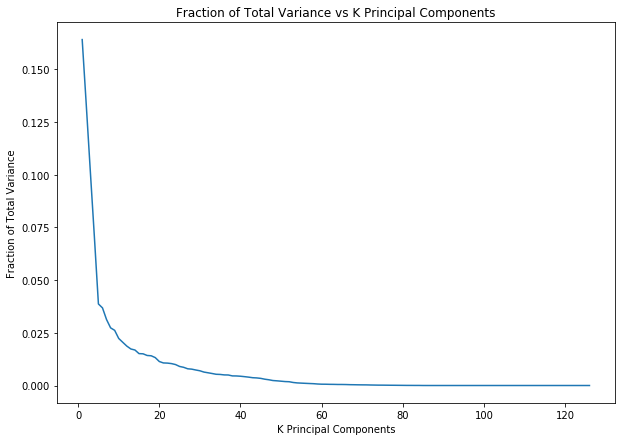

In [5]:
def P1():

    ### STUDENT START ###
    k_values = [1,2,3,4,5,10,20,30,40,50] #k values that will be used to print a few fractions of total variance
    fraction_total_var = [] #empty list for fractions of total variance explained by first k principal components
    
    #Find fraction of total variance explained by all possible number of principal components (1-126)
    for k in range(1,127):
        pca = PCA(n_components=k) # create an instance of the PCA class and project to 2 dimensions
        # fit the data using the original train_data and transform train_data
        train_pca = pca.fit_transform(train_data)
        var_ratio = pca.explained_variance_ratio_[k-1] #fraction of total variance explained by kth component
        fraction_total_var.append(var_ratio) #append the new k component's fraction of total variance to list
        #print fraction of total variance explained by kth component if k is in k_values
        if k in k_values:
            print("Fraction of Total Variance Explained by k = {} is {}".format(k,np.round(var_ratio,5)))
    
    #Lineplot of Total Variance vs. Number of Principal Components
    plt.figure(figsize=(10,7))
    plt.plot(range(1,127),fraction_total_var)
    plt.xlabel('K Principal Components')
    plt.ylabel("Fraction of Total Variance")
    plt.title("Fraction of Total Variance vs K Principal Components")
    plt.show()
    

    ### STUDENT END ###

P1()

### Part 2:

PCA can be very useful for visualizing data. Project the training data down to 2 dimensions and show as a square scatterplot. Show the positive (poisonous) examples in red and the negative (non-poisonous) examples in green. Here's a reference for plotting: http://matplotlib.org/users/pyplot_tutorial.html

Notes:
* You can use `PCA` to produce a PCA analysis.

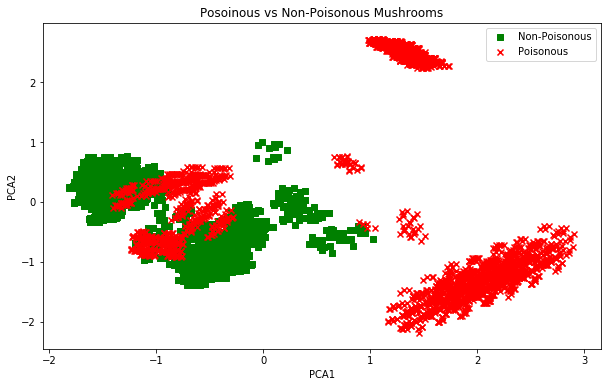

In [6]:
def P2():

    ### STUDENT START ###
    
    #PCA Analysis
    pca = PCA(n_components=2) #create an instance of the PCA class and project to 2 dimensions
    train_pca = pca.fit_transform(train_data) # fit the data using the original train_data and transform train_data

    #Setting up plot
    colors = ['green','red'] #colors for markers
    markers = ['s', 'x'] #markers for points
    labels = ["Non-Poisonous","Poisonous"] #labels for legend
    plt.figure(figsize = (10,6)) #size of plot
    
    #Plot the training data projected to 2 dimensions as a square scatterplot
    for class_value, color, label, marker in zip(np.unique(train_labels), colors, labels, markers):
        plt.scatter(train_pca[train_labels==class_value, 0],
                train_pca[train_labels==class_value, 1],
                color = color, label = label, marker=marker)
    
    plt.legend(loc='best')
    plt.title("Posoinous vs Non-Poisonous Mushrooms")
    plt.xlabel('PCA1')
    plt.ylabel('PCA2')
    plt.show()
    
### STUDENT END ###

P2()

### Part 3:

Fit a k-means cluster model with 6 clusters over the 2d projected data. As in part 2, show as a square scatterplot with the positive (poisonous) examples in red and the negative (non-poisonous) examples in green.  For each cluster, mark the centroid and plot a circle that goes through the cluster's example that is most distant from the centroid.

Notes:
* You can use `KMeans` to produce a k-means cluster analysis.
* You can use `linalg.norm` to determine distance (dissimilarity) between observations.

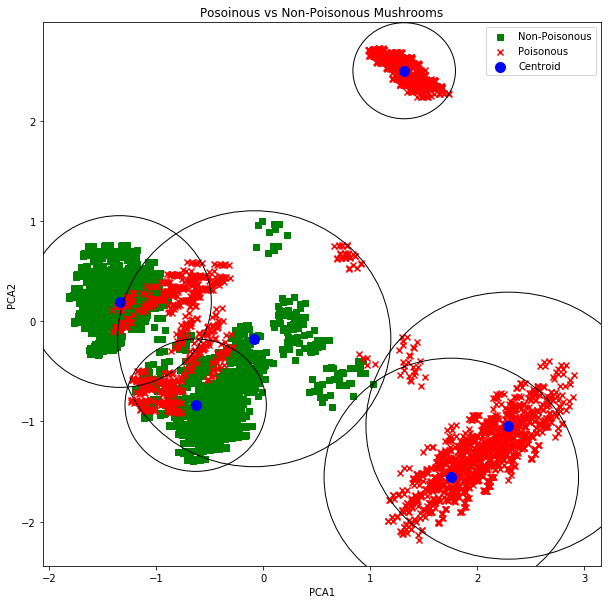

In [7]:
def P3():

    ### STUDENT START ###
    
    #PCA Analysis
    pca = PCA(n_components=2) #create an instance of the PCA class and project to 2 dimensions
    train_pca = pca.fit_transform(train_data) # fit the data using the original train_data and transform train_data

    #KMeans Analysis
    km = KMeans(n_clusters=6) #create an instance of KMeans class with 6 clusters
    y_km = km.fit_predict(train_pca)#fit the data using the 2d projected data and transform it
    centroids = km.cluster_centers_ #find coordinates of the centroids of the 6 clusters

    #Setting up plot
    colors = ['green','red']#colors for markers
    markers = ['s', 'x']#markers for points
    labels = ["Non-Poisonous","Poisonous"]#labels for legend

    #Plot 2d projected data
    fig,ax = plt.subplots(figsize = (10,10))
    for class_value, color, label, marker in zip(np.unique(train_labels), colors, labels, markers):
        plt.scatter(train_pca[train_labels==class_value, 0],
                    train_pca[train_labels==class_value, 1],
                    color = color, label = label, marker=marker)

    #Plot the centroids and circles that go through the clusters' examples that are most distant from centroids
    for count, centroid in enumerate(centroids):
        km_pca = train_pca[y_km == count,] #find train_pca points within each cluster
        distances = np.linalg.norm(km_pca - centroid, axis=1) #Find distances of points within each cluster
        max_dist = max(distances) #Finds maximum distance from center of centroid
        #Plot a circle for each cluster using the centroid as center and distance of furthest point as radius
        cir = plt.Circle(centroid, radius= max_dist, fill=False)
        ax.add_artist(cir)
        
    
    plt.scatter(centroids[:,0],centroids[:,1], s = 100,marker ="o",color = "blue", label = "Centroid")
    plt.legend(loc='best')
    plt.title("Posoinous vs Non-Poisonous Mushrooms")
    plt.xlabel('PCA1')
    plt.ylabel('PCA2')  
    plt.show()

    ### STUDENT END ###

P3()

### Part 4:

Fit Gaussian mixture models for the positive (poisonous) examples in your 2d projected data. Vary the number of mixture components from 1 to 4 and the covariance matrix type 'spherical', 'diag', 'tied', 'full' (that's 16 models).  Show square plots of the estimated density contours presented in a 4x4 grid - one row each for a number of mixture components and one column each for a convariance matrix type.  

Notes:
* You can use `GaussianMixture(n_components=..., covariance_type=..., random_state=12345)` to produce a Gaussian mixture model.
* You can use `contour` in combination with other methods to plot contours, like in this example: http://scikit-learn.org/stable/auto_examples/mixture/plot_gmm_pdf.html#example-mixture-plot-gmm-pdf-py
* You can use `contour` without the `norm` and `levels` parameters. 

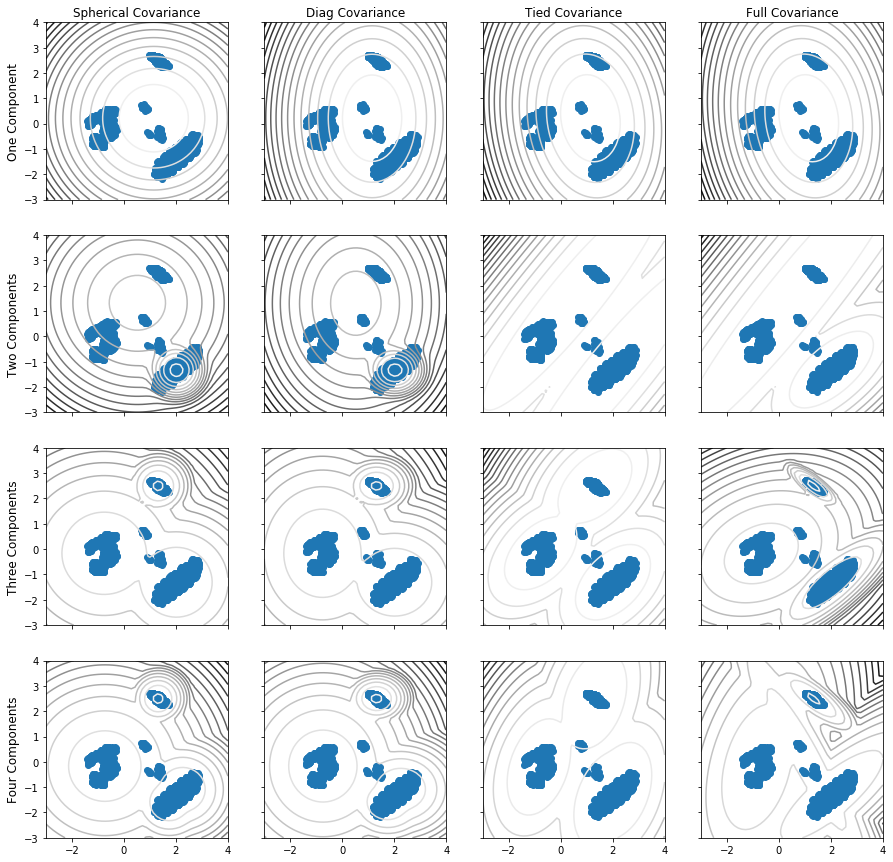

In [8]:
def P4():

    ### STUDENT START ###
    
    #PCA Analysis
    pca = PCA(n_components=2) #create an instance of the PCA class and project to 2 dimensions
    train_pca = pca.fit_transform(train_data)#fit the data using the original train_data; transform train_data
    train_pca = train_pca[train_labels == 1] #Filter train_pca for poisonous mushrooms

    full_gmms = [] #empty list to hold gmm models
    cov_types = ["spherical","diag","tied","full"] #list of covariance types

    #Initialize subplots for 4x4 grid and intialize colulmn names and row names for grid
    fig, axes = plt.subplots(nrows=4, ncols=4, sharex=True, sharey=True, figsize=(15, 15))
    cols = ["Spherical Covariance", "Diag Covariance","Tied Covariance","Full Covariance"] #col names for grid
    rows = ["One Component","Two Components","Three Components","Four Components"] #row names for grid
    
    #Setting column names for grid
    for ax, col in zip(axes[0], cols):
        ax.set_title(col)
    #Setting row names for grid
    for ax, row in zip(axes[:,0], rows):
        ax.set_ylabel(row, rotation=90, size='large')

    #Create 16 different gmm models by varying the number of GMM components from 1-4 for each of the 4 cov types
    for i in range(1,5):
        gmms = [GaussianMixture(n_components= i, 
                                covariance_type= c, 
                                random_state=12345).fit(train_pca) for c in cov_types]
        full_gmms.append(gmms) #append all 4 gmm models for the respective GMM component to full_gmms list
    
    #Concatenate full_gmms, a 2D array with 4 arrays, to create 1D array with all 16 gmm models 
    full_gmms = np.concatenate(full_gmms)

    
    #Plot 16 GMM models in 4x4 grid with one row each for a number of mixture components and one column each 
    #for a convariance matrix type. Each square plot shows the estimated density contour of the model.
    for count,gmm in enumerate(full_gmms):
        axes = axes.flatten()
        x = np.linspace(-3., 4.)
        y = np.linspace(-3., 4.)
        X, Y = np.meshgrid(x, y)
        XX = np.array([X.ravel(), Y.ravel()]).T
        Z = -gmm.score_samples(XX)
        Z = Z.reshape(X.shape)
        axes[count].contour(X, Y, Z,15,cmap = "binary")
        axes[count].scatter(train_pca[:, 0],
                    train_pca[:, 1])
    plt.axis('tight')
    plt.show()
    
    ### STUDENT END ###

P4()

### Part 5:

Fit two Gaussian mixture models, one for the positive examples and one for the negative examples in your 2d projected data. Use 4 mixture components and full convariance for each model.  Predict the test example labels by picking the labels corresponding to the larger of the two models' probabilities.  What is the accuracy of you predictions on the test data?

Notes:
* You can use `GaussianMixture(n_components=..., covariance_type=..., random_state=12345)` to produce a Gaussian mixture model.
* You can use `GaussianMixture`'s `score_samples` method to find the probabilities.

In [9]:
def P5():

    ### STUDENT START ###
    
    #PCA Analysis 
    pca = PCA(n_components=2)#create an instance of the PCA class and project to 2 dimensions
    train_pca = pca.fit_transform(train_data)#fit the data using the original train_data; transform train_data
    test_pca = pca.transform(test_data)#transform the test data to 2 dimensions

    train_pca_pos = train_pca[train_labels == 1] #Filter Train_PCA for Poisonous Mushrooms
    train_pca_neg = train_pca[train_labels == 0] #Filter Train_PCA for Non-Poisonous Mushrooms

    #GMM Analysis with 4 mixture components and full covariance
    gmm_pos = GaussianMixture(n_components= 4, covariance_type= "full", random_state=12345).fit(train_pca_pos)
    gmm_neg = GaussianMixture(n_components= 4, covariance_type= "full", random_state=12345).fit(train_pca_neg)

    #Find probabilities for both positive and negative models
    correct = 0 #counter for how many examples we correctly predict
    predict_pos = gmm_pos.score_samples(test_pca) #find probabilities for gmm_pos model
    predict_neg = gmm_neg.score_samples(test_pca) #find probabilities for gmm_neg model

    #Predict test example labels by picking the labels corresponding to the larger of the two models' probabilities
    for i in range(len(test_pca)):
        if predict_pos[i] > predict_neg[i]:
            prediction = 1
        else:
            prediction = 0
        if prediction == test_labels[i]:
            correct += 1
    accuracy = correct/len(test_pca)
    print("Accuracy:" + str(accuracy))

    ### STUDENT END ###

P5()

Accuracy:0.9501779359430605


### Part 6:

Run a series of experiments to find the Gaussian mixture model that results in the best accuracy with no more than 50 parameters.  Do this by varying the number of PCA components, the number of GMM components, and the covariance type.

Notes:
* You can use `GaussianMixture(n_components=..., covariance_type=..., random_state=12345)` to produce a Gaussian mixture model.


* For spherical, diag, and full covariance types:
  * number of parameters = (number of parameters per gmm component * number of gmm components - 1) * number of classes
  * number of parameters per gmm component includes all the means plus all the non-zero, non-duplicated values in the covariance matrix plus the mixing weight
  * Each mixing weight parameter indicates how much to weight a particular gmm component; the -1 above accounts for the fact that the mixing weights must sum to 1, so you do not need to include the last mixing weight as its own parameter


* To calculate the number of parameters for tied covariance type:
  * number of parameters = (number of parameters per class - 1) * number of classes
  * number of parameters per class includes all the means and mixing weights for all the gmm components plus all the non-zero, non-duplicated values in the one shared covariance matrix
  * Each mixing weight parameter indicates how much to weight a particular gmm component; the -1 above accounts for the fact that the mixing weights must sum to 1, so you do not need to include the last mixing weight as its own parameter

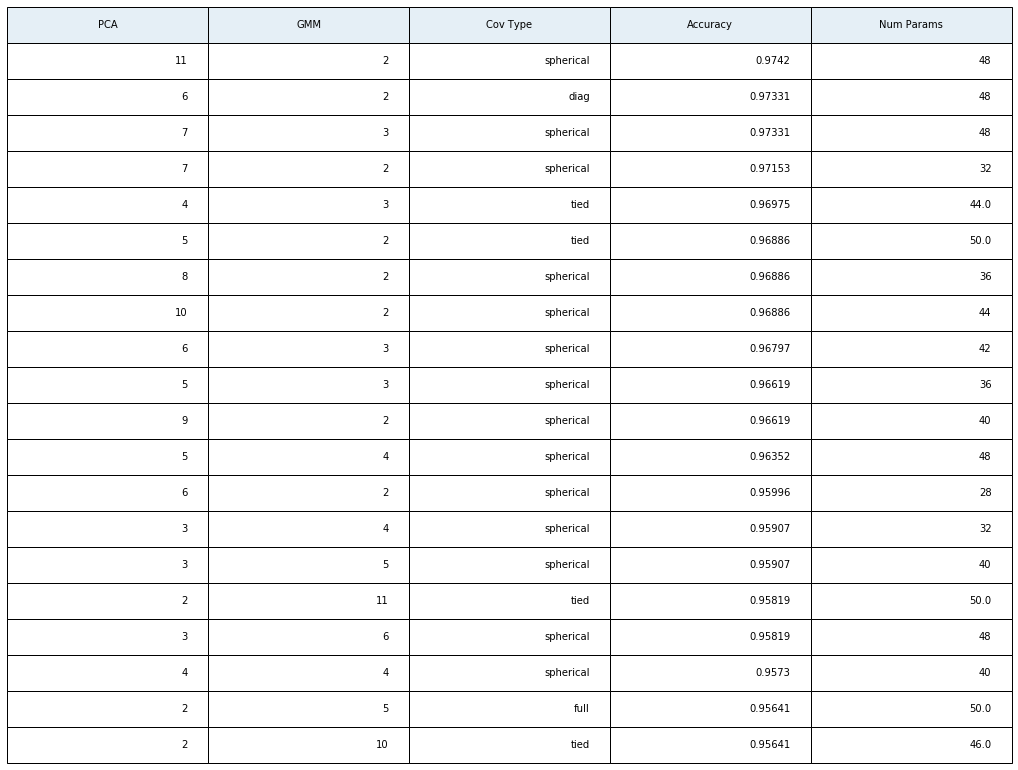

In [10]:
def num_parameters(n_pca,n_gmm,cov_type):
    '''Returns the number of parameters for each model based on the number of pca and gmm components and
       the covariance type.
    '''
    num_mean_components = n_pca * n_gmm 
    if cov_type == "full":
        num_cov_components = ((n_pca*(n_pca + 1))/ 2) * n_gmm
    if cov_type == "diag":
        num_cov_components = n_pca * n_gmm
    if cov_type == "spherical":
        num_cov_components = n_gmm
    if cov_type == "tied": 
        num_cov_components = (n_pca*(n_pca + 1)/ 2)
    num_params = (num_mean_components + num_cov_components) * 2
    return num_params
    
def P6():
    '''Runs a series of trials to find the Gaussian mixture model that results in the best accuracy 
       with no more than 50 parameters. Does this by varying the number of PCA components, the number of 
       GMM components,and the covariance type. Runs trials for 1-20 pca components and 1-20 gmm components for
       every covariance type. Then, prints a table for the 20 trials with the highest accuracies that have no more 
       than 50 parameters with columns for the trial's number of pca and gmm components, its covariance type, 
       accuracy, and number of parameters.
    '''

    ### STUDENT START ###
    
    cov_types = ["spherical","diag","tied","full"] #covariance matrix types
    col_names = ["PCA","GMM","Cov Type","Accuracy","Num Params"] #col_names for table
    data = [] #empty list to hold values for table

    for n_pca in range(1,20):
        for n_gmm in range(1,20):
            for cov_type in cov_types:
                #PCA Analysis 
                pca = PCA(n_components= n_pca)#create an instance of the PCA class and project to n_pca dimensions
                train_pca = pca.fit_transform(train_data)#fit data using the original train_data; transform train_data
                test_pca = pca.transform(test_data)#transform the test data to n_pca dimensions

                train_pca_pos = train_pca[train_labels == 1] #Filter Train_PCA for Poisonous Mushrooms
                train_pca_neg = train_pca[train_labels == 0] #Filter Train_PCA for Non-Poisonous Mushrooms

                #GMM Analysis with n_gmm mixture components and cov_type covariance
                gmm_pos = GaussianMixture(n_components= n_gmm,
                                          covariance_type=cov_type, 
                                          random_state=12345).fit(train_pca_pos)
                gmm_neg = GaussianMixture(n_components= n_gmm, 
                                          covariance_type=cov_type, 
                                          random_state=12345).fit(train_pca_neg)
                
                #Find probabilities for both positive and negative models
                correct = 0 #counter for how many examples we correctly predict
                predict_pos = gmm_pos.score_samples(test_pca) #find probabilities for gmm_pos model
                predict_neg = gmm_neg.score_samples(test_pca) #find probabilities for gmm_neg model
                
                #Predict test example labels by picking labels corresponding to larger of two models' probabilities
                for i in range(len(test_pca)):
                    if predict_pos[i] > predict_neg[i]:
                        prediction = 1
                    else:
                        prediction = 0
                    if prediction == test_labels[i]:
                        correct += 1
                accuracy = round(correct/len(test_pca),5) #find accuracy of this trial
                n_params = num_parameters(n_pca,n_gmm,cov_type) #find number of parameters 
                
                #Only keep trials that have less than 50 parameters and accuracy greater than or equal to 0.95
                if n_params <= 50 and accuracy >= 0.95: 
                    values = (n_pca,n_gmm,cov_type,accuracy,n_params)
                    data.extend(values)

    #Reshape data for table and select the 20 trials with highest accuracy for the table. 
    data_reshape = np.array(data).reshape((int(len(data)/5)),5) #reshape data for table
    data_sorted = sorted(data_reshape, key=lambda x: x[3], reverse=True) #sort data with decreasing accuracy
    data_top_20 = data_sorted[:20] #take 20 trials with highest accuracies
    
    #Create table with differing parameters for 20 trials with highest accuracies
    ccolors = plt.cm.BuPu(np.full(5, 0.1))
    table = plt.table(cellText = data_top_20, 
                      colLabels = col_names,
                      colColours = ccolors,
                      loc='center')
    plt.axis("off")
    table.scale(3,3)
    plt.show()

    ### STUDENT END ###

P6()